original shape (512, 512, 3)
mask shape (512, 512, 3)
mask_max 255
original max 255
mask shape (512, 512, 3)


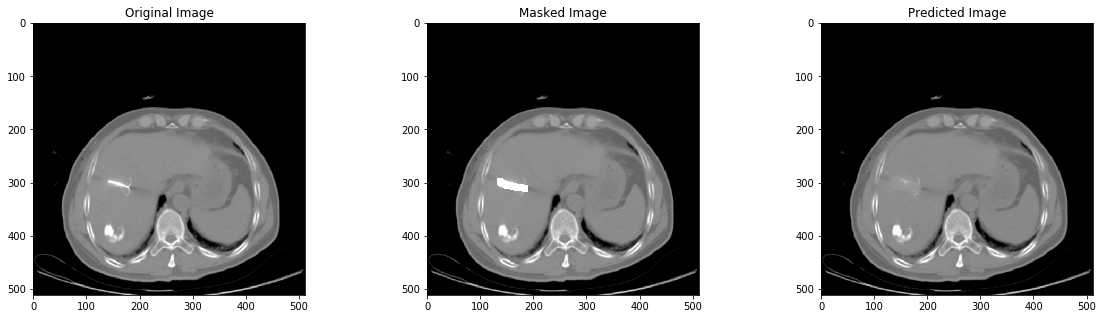

In [22]:
from skimage import io
from copy import deepcopy
import numpy as np
import os
from libs.pconv_model import PConvUnet
from matplotlib import pyplot as plt


os.environ["CUDA_VISIBLE_DEVICES"] = "0"
test_path = "./data/liver_image/test/ct/"
ori = io.imread(test_path + 'img/' + 'test_44.png')
print('original shape {}'.format(ori.shape))
mask = io.imread(test_path + 'mask/' + 'seg_44.png')
if mask.shape[2] != 3:
    mask = mask[:, :, 0:3]
print('mask shape {}'.format(mask.shape))
print('mask_max {}'.format(mask.max()))
mask = mask/255.
mask = 1 - mask
print ('original max {}'.format(ori.max()))
#ori = ori / ori.max()
ori = ori / 255.

masked = deepcopy(ori)
masked[mask==0] = 1
print("mask shape {}".format(masked.shape))

ori = np.expand_dims(ori, axis=0)
mask = np.uint8(np.expand_dims(mask, axis=0))
masked = np.expand_dims(masked, axis=0)

model = PConvUnet(weight_filepath='data/logs_ct/')
model.load("data/logs_ct/283_weights_2018-11-30-14-29-30.h5")
pred_img = model.predict([masked, mask])

_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(ori[0])
axes[1].imshow(masked[0])
axes[2].imshow(pred_img[0] * 1.)
axes[0].set_title('Original Image')
axes[1].set_title('Masked Image')
axes[2].set_title('Predicted Image')
#plt.savefig(r'data/liver_image/test/img_test_result.png')
plt.show()
plt.close()